In [1]:
# Simple Linear Regression
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Importing the dataset
dataset = pd.read_csv('Salary_Data.csv') ## Read the csv file and assign it to pandas dataframe
dataset.head() ## Print the dataset

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
X = dataset.drop(['Salary'], axis=1) ## independent variable,axis=1 means column
y = dataset.Salary ## dependant variable

print(X.head())
print("\n")
print(y.head())

   YearsExperience
0              1.1
1              1.3
2              1.5
3              2.0
4              2.2


0    39343.0
1    46205.0
2    37731.0
3    43525.0
4    39891.0
Name: Salary, dtype: float64


In [5]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state = 6)

print(X_train)
print("\n")
print(y_train)

    YearsExperience
18              5.9
2               1.5
8               3.2
21              7.1
4               2.2
14              4.5
12              4.0
26              9.5
23              8.2
24              8.7
11              4.0
1               1.3
16              5.1
25              9.0
15              4.9
13              4.1
29             10.5
20              6.8
3               2.0
9               3.7
10              3.9


18     81363.0
2      37731.0
8      64445.0
21     98273.0
4      39891.0
14     61111.0
12     56957.0
26    116969.0
23    113812.0
24    109431.0
11     55794.0
1      46205.0
16     66029.0
25    105582.0
15     67938.0
13     57081.0
29    121872.0
20     91738.0
3      43525.0
9      57189.0
10     63218.0
Name: Salary, dtype: float64


In [6]:
print(X_test)
print("\n")
print(y_test)

    YearsExperience
0               1.1
28             10.3
27              9.6
6               3.0
17              5.3
19              6.0
7               3.2
5               2.9
22              7.9


0      39343.0
28    122391.0
27    112635.0
6      60150.0
17     83088.0
19     93940.0
7      54445.0
5      56642.0
22    101302.0
Name: Salary, dtype: float64


In [7]:
# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train) ## Fitting my training data to the algorithm for it to understand the patterns

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [8]:
print("Coefficient=",regressor.coef_)

# Intercept ## Mean value of Y when X=0 [constant=when all independent variables are zero]
print("Intercept:",regressor.intercept_)

Coefficient= [9721.5195311]
Intercept: 23134.03331551417


In [9]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
print(y_pred)
print("\n")
print(y_test)

[ 33827.70479973 123265.68448585 116460.62081408  52298.59190882
  74658.08683035  81463.15050212  54242.89581504  51326.43995571
  99934.03761121]


0      39343.0
28    122391.0
27    112635.0
6      60150.0
17     83088.0
19     93940.0
7      54445.0
5      56642.0
22    101302.0
Name: Salary, dtype: float64


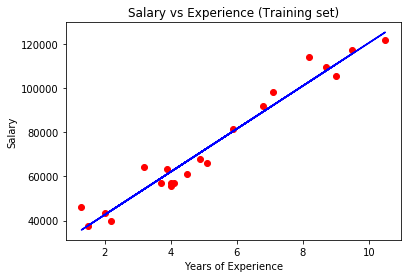

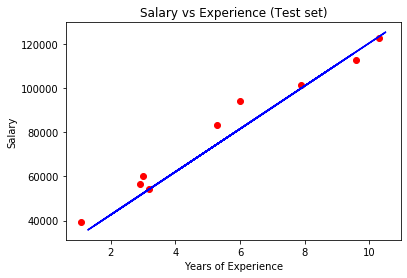

In [10]:
# Visualising the Training set results
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

# Visualising the Test set results
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [11]:
from sklearn import metrics

In [12]:
## The lower these metrics, the better the model is
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 5095.488652996795
MSE: 40485121.43858273
RMSE: 6362.791953111679


In [13]:
from sklearn.metrics import r2_score 
## How well the model can explain future data
# r2= It tells how much the regression line is close to the actual line : accuracy of my model : Higher the better
print('r2:',r2_score(y_test, y_pred)) ## Closer to 1 means better prediction

r2: 0.946128551845447


In [14]:
y_pred = regressor.predict(11)
y_pred

array([130070.74815762])

In [ ]:
#Conclusion : 

#2. I am 94.6% confident that the salary of the person will be (130070-6362) to (130070+6362) ie, (123708- 136432)


In [ ]:
y_pred = regressor.predict(11.5)
y_pred

In [ ]:
#I am 94.6% confident that the salary of the person will be (134931-6362) to (134931+6362) ie, (128569 to 141293)

# Cross validation

In [ ]:
from sklearn.model_selection import cross_val_score 

regression_avg = cross_val_score(estimator = regressor, X = X_train, y = y_train, cv = 5,scoring='neg_mean_absolute_error') 
print ("Cross Val Mean Absolute Error",regression_avg.mean())